<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">ANALYSE DU STOCK ET DES VENTES DU SITE BOTTLENECK</h1>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.1 - Importation des librairies</h3>
</div>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Importation de la librairie Pandas
import pandas as pd

In [4]:
#Importation de la librairie plotly express
import plotly.express as px

In [5]:
# Sometimes simply clearing the Data Validation rules in the Workbook is not a viable solution - perhaps other users rely on the rules, or maybe they are locked for editing, etc.
#The error can be ignored using a simple filter, and the Workbook can remain untouched, as:
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

#Trouver dans Google l'instruction permettant d'afficher toutes les colonnes d'un dataframe
#Saisir, dans Google, les mots clés "display all columns dataframe Pandas", par exemple.
#Dans les résultats de la recherche, privilégiez les solutions provenants de Stack Overflow ou Medium

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 - Chargements des fichiers</h3>
</div>

In [6]:

#Importation du fichier web.xlsx
df_web = pd.read_excel("/content/drive/MyDrive/Colab_Notebooks/P6/web.xlsx")
#Importation du fichier erp.xlsx
df_erp = pd.read_excel("/content/drive/MyDrive/Colab_Notebooks/P6/erp.xlsx")
#importation du fichier liaison.xlsx
df_liaison = pd.read_excel("/content/drive/MyDrive/Colab_Notebooks/P6/liaison.xlsx")

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1 - Analyse exploratoire du fichier erp.xlsx</h3>
</div>

In [7]:
#Afficher les dimensions du dataset
print(df_erp.shape) #pour voir rapidement
print("Le tableau comporte {} observation(s) ou article(s)".format(df_erp.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_erp.shape[1]))

(825, 6)
Le tableau comporte 825 observation(s) ou article(s)
Le tableau comporte 6 colonne(s)


In [8]:
#Consulter le nombre de colonnes
print("Dans cette table il y a ", df_erp.shape[1],"colonnes")
#La nature des données dans chacune des colonnes
print('colonne | Type'), print(df_erp.dtypes)
#Le nombre de valeurs présentes dans chacune des colonnes
print('cette table contient', df_erp.shape[0],'valeurs')

Dans cette table il y a  6 colonnes
colonne | Type
product_id          int64
onsale_web          int64
price             float64
stock_quantity      int64
stock_status       object
purchase_price    float64
dtype: object
cette table contient 825 valeurs


In [9]:
#Afficher les 5 premières lignes de la table
print(df_erp.head())

   product_id  onsale_web  price  stock_quantity stock_status  purchase_price
0        3847           1   24.2              16      instock           12.88
1        3849           1   34.3              10      instock           17.54
2        3850           1   20.8               0   outofstock           10.64
3        4032           1   14.1              26      instock            6.92
4        4039           1   46.0               3   outofstock           23.77


In [10]:
#Vérifier si il y a les lignes en doublons dans la colonne product_id
print(df_erp[df_erp["product_id"].duplicated(keep=False)])

Empty DataFrame
Columns: [product_id, onsale_web, price, stock_quantity, stock_status, purchase_price]
Index: []


In [11]:
#Afficher les valeurs distinctes de la colonne stock_status
print(df_erp["stock_status"].unique())
#À quelle(s) autre(s) colonne(s) sont-elles liées ? stock quantity

['instock' 'outofstock']


In [12]:
#Création d'une colonne "stock_status_2
#La valeur de cette deuxième colonne sera fonction de la valeur dans la colonne "stock_quantity"
#si la valeur de la colonne "stock_quantity" est nulle renseigner "outofstock" sinon mettre "instock"
df_erp["stock_status_2"] = df_erp["stock_quantity"].apply(lambda x: "outofstock" if x == 0 else "instock") #lambda : fonction lambda  applique la fonction suivante à toutes les valeurs


In [13]:
#Vérifions que les 2 colonnes sont identiques:
#Les 2 colonnes sont strictement identiques si les valeurs de chaque ligne sont strictement identiques 2 à 2
#La comparaison de 2 colonnes peut se réaliser simplement avec l'instruction ci-dessous:
df_erp["stock_status"] == df_erp["stock_status_2"]

#Le résultat est l'affichage de True ou False pour chacune des lignes du dataset
#C'est un bon début, mais difficile à exploiter

,0
0,True
1,True
2,True
3,True
4,False
...,...
820,True
821,True
822,True
823,True


In [14]:
#Mais il est possible de synthétiser ce résultat en effectuant la somme de cette colonne:
#True vaut 1 et False 0
#Nous devrions obtenir la somme de 824 qui correspond au nombre de lignes dans ce dataset
sum(df_erp["stock_status"] == df_erp["stock_status_2"])

821

In [15]:
#Si les colonnes ne sont absolument pas identiques ligne à ligne alors identifier la ligne en écart
##lien pour apprendre à réaliser des filtres dans Pandas:
##https://bitbucket.org/hrojas/learn-pandas/src/master/
##Lesson 3
diff = df_erp[df_erp["stock_status"] != df_erp["stock_status_2"]]
print(diff)

     product_id  onsale_web  price  stock_quantity stock_status  \
4          4039           1   46.0               3   outofstock   
398        4885           1   18.7               0      instock   
449        4973           0   10.0             -10   outofstock   
573        5700           1   44.5              -1   outofstock   

     purchase_price stock_status_2  
4             23.77        instock  
398            9.66     outofstock  
449            4.96        instock  
573           22.30        instock  


In [16]:
#Corriger la ou les données incohérentes
df_erp["stock_status"] = df_erp["stock_status_2"]
#Verification en utilisant le même code que plus haut pour afficher les problemes
sum(df_erp["stock_status"] == df_erp["stock_status_2"])
#df_erp.iloc[398]

825

In [17]:
df_erp.nunique()

,0
product_id,825
onsale_web,2
price,383
stock_quantity,84
stock_status,2
purchase_price,660
stock_status_2,2


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1 - Analyse exploratoire de chaque variable du fichier erp.xlsx</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.1 - Analyse de la variable PRIX</h3>
</div>

In [18]:
###############
## LES PRIX  ##
###############

#Vérification des prix: Y a t-il des prix non renseignés, négatif ou nul?
#Afficher le ou les prix non renseignés dans la colonne "price"
print("Nombres d'article avec un prix non renseignés: {}".format(df_erp['price'].isnull().sum())) #Saisir l'instruction manquante dans la fonction format
#Afficher le prix minimum de la colonne "price"
print("Le prix minimum est de: {}".format(df_erp['price'].min()))
#Afficher le prix maximum de la colonne "price"
print("Le prix maximum est de: {}".format(df_erp['price'].max()))
#Affichier les prix inférieurs à 0 (qu'est ce qu'il faut en faire ?)
print(df_erp[df_erp['price']<0])
#hypothese erreur de saisie, on choisie de passer le prix en valeur absolue:
df_erp['price'] = df_erp['price'].abs()
df_erp.iloc[739]

Nombres d'article avec un prix non renseignés: 0
Le prix minimum est de: -20.0
Le prix maximum est de: 225.0
     product_id  onsale_web  price  stock_quantity stock_status  \
151        4233           0  -20.0               0   outofstock   
469        5017           0   -8.0               0   outofstock   
739        6594           0   -9.1              19      instock   

     purchase_price stock_status_2  
151           10.33     outofstock  
469            4.34     outofstock  
739            4.61        instock  


,739
product_id,6594
onsale_web,0
price,9.1
stock_quantity,19
stock_status,instock
purchase_price,4.61
stock_status_2,instock


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.2 - Analyse de la variable STOCK</h3>
</div>

In [19]:
#######################
### stock_quantity  ###
#######################

#Vérification de la colonne stock quantity
#Afficher la quantité minimum de la colonne "stock_quantity"
print("la quantité minimum est de {}".format(df_erp['stock_quantity'].min()))
#Afficher la quantité maximum de la colonne "stock_quantity"
print("la quantité maximum est de {}".format(df_erp["stock_quantity"].max()))
#Affichier les stocks inférieurs à 0 (qu'est ce qu'il faut en faire ?)
print(df_erp[df_erp['stock_quantity']<0])
#hypothese on choisi de remettre ce stock en stock 0 :
df_erp.loc[df_erp["stock_quantity"]<0, 'stock_quantity'] = 0
df_erp["stock_status"] = df_erp["stock_quantity"].apply(lambda x: "outofstock" if x == 0 else "instock")
df_erp.iloc[398]


la quantité minimum est de -10
la quantité maximum est de 145
     product_id  onsale_web  price  stock_quantity stock_status  \
449        4973           0   10.0             -10      instock   
573        5700           1   44.5              -1      instock   

     purchase_price stock_status_2  
449            4.96        instock  
573           22.30        instock  


,398
product_id,4885
onsale_web,1
price,18.7
stock_quantity,0
stock_status,outofstock
purchase_price,9.66
stock_status_2,outofstock


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.3 - Analyse de la variable ONSALE_WEB</h3>
</div>

In [20]:
#Vérification de la colonne onsale_web et des valeurs qu'elle contient? Que signifient-elles?
df_erp['onsale_web'].unique()
# 0 correspond à false et 1 à True. Cela signifie que si onsale_web = 0 alors le produit n'est pas vendu sur internet et si onsale_web = 1 alors le produit est vendu sur internet

array([1, 0])

In [21]:
#Quelles sont les colonnes à conserver selon vous?
#Toutes sauf stock_status_2
df_erp

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status_2
0,3847,1,24.2,16,instock,12.88,instock
1,3849,1,34.3,10,instock,17.54,instock
2,3850,1,20.8,0,outofstock,10.64,outofstock
3,4032,1,14.1,26,instock,6.92,instock
4,4039,1,46.0,3,instock,23.77,instock
...,...,...,...,...,...,...,...
820,7203,0,45.0,30,instock,23.48,instock
821,7204,0,45.0,9,instock,24.18,instock
822,7247,1,54.8,6,instock,27.18,instock
823,7329,0,26.5,14,instock,13.42,instock


In [22]:
#Supprimer la colonne comportant le libellé "stock_status_2" car elle est redondante
#avec la colonne "stock_status".
df_erp.drop('stock_status_2', axis=1, inplace=True) #axis = 1 pour colonne #axis = 0 pour ligne

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.4 - Analyse de la variable prix d'achat</h3>
</div>

In [23]:
######################
##   prix d'achat   ##
######################

#Vérification de la colonne purchase_price :
#Afficher le ou les prix non renseignés dans la colonne "purchase_price"
print("Nombre de prix de la colonne purchase_price non renseignés: {}".format(df_erp['purchase_price'].isnull().sum()))
#Afficher le prix minimum de la colonne "purchase_price"
print("Prix d'achat minimum: {}".format(df_erp['purchase_price'].min()))
#Afficher le prix maximum de la colonne "purchase_price"
print("Prix d'achat maximum: {}".format(df_erp['purchase_price'].max()))


Nombre de prix de la colonne purchase_price non renseignés: 0
Prix d'achat minimum: 2.74
Prix d'achat maximum: 137.81


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.2 - Analyse exploratoire du fichier web.xlsx</h3>
</div>


In [24]:
#Dimension du dataset
#Nombre d'observations
print("Le tableau comporte {} observation(s) ou article(s)".format(df_web.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_web.shape[1]))
#Nombre de caractéristiques


Le tableau comporte 1513 observation(s) ou article(s)
Le tableau comporte 29 colonne(s)


In [25]:
#Consulter le nombre de colonnes

#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
print('colonne | Type'), print(df_web.dtypes)
print('cette table contient', df_web.shape[0],'valeurs')
df_web.head()

colonne | Type
sku                              object
virtual                           int64
downloadable                      int64
rating_count                      int64
average_rating                  float64
total_sales                     float64
tax_status                       object
tax_class                       float64
post_author                     float64
post_date                datetime64[ns]
post_date_gmt            datetime64[ns]
post_content                    float64
product_type                     object
post_title                       object
post_excerpt                     object
post_status                      object
comment_status                   object
ping_status                      object
post_password                   float64
post_name                        object
post_modified            datetime64[ns]
post_modified_gmt        datetime64[ns]
post_content_filtered           float64
post_parent                     float64
guid                     

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,38,0,0,0,0.0,10.0,NaN,NaN,2.0,2018-04-18 12:25:58,...,emile-boeckel-cremant-brut-blanc-de-blancs,2020-08-27 17:15:03,2020-08-27 15:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1,38,0,0,0,0.0,10.0,taxable,NaN,2.0,2018-04-18 12:25:58,...,emile-boeckel-cremant-brut-blanc-de-blancs,2020-08-27 17:15:03,2020-08-27 15:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,41,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-04-14 12:01:43,...,marcel-windholtz-eau-de-marc-de-gewurztraminer,2020-08-03 10:25:02,2020-08-03 08:25:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,41,0,0,0,0.0,6.0,NaN,NaN,2.0,2018-04-14 12:01:43,...,marcel-windholtz-eau-de-marc-de-gewurztraminer,2020-08-03 10:25:02,2020-08-03 08:25:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
4,304,0,0,0,0.0,8.0,NaN,NaN,2.0,2018-02-13 12:57:44,...,gosset-champagne-grande-reserve,2020-08-27 11:25:02,2020-08-27 09:25:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [26]:
print(df_web.nunique())
df_web.isnull().sum()
#Selon vous, quelles sont les colonnes à conserver ?

# je garderais seulement :

# sku	total_sales tax_status	post_date_gmt	product_type	post_title post status	post_name	post_modified_gmt	guid	post_type

sku                       714
virtual                     1
downloadable                1
rating_count                1
average_rating              1
total_sales                29
tax_status                  1
tax_class                   0
post_author                 2
post_date                 716
post_date_gmt             716
post_content                0
product_type                7
post_title                713
post_excerpt              679
post_status                 1
comment_status              1
ping_status                 1
post_password               0
post_name                 716
post_modified             589
post_modified_gmt         589
post_content_filtered       0
post_parent                 1
guid                     1430
menu_order                  1
post_type                   2
post_mime_type              1
comment_count               1
dtype: int64


,0
sku,85
virtual,0
downloadable,0
rating_count,0
average_rating,83
total_sales,83
tax_status,797
tax_class,1513
post_author,83
post_date,83


In [27]:
#Si vous avez défini des colonnes à supprimer, effectuer l'opération
df_web.drop(['virtual',	'downloadable',	'rating_count',	'average_rating',	'tax_class',	'post_author',	'post_date',	'post_content',	'post_excerpt',	'comment_status',	'ping_status',	'post_password',	'post_modified',	'post_content_filtered',	'post_parent',	'menu_order', 'post_mime_type', 'comment_count'], axis=1, inplace=True)


In [28]:
#Visualisation des valeurs de la colonne sku
display (df_web['sku'].nunique()) #compte le nombre de valeur unique
print(df_web.shape[0]) #compte le nombre de ligne
#Quelles sont les valeurs qui ne semblent pas respecter la régle de codification?
#les valeurs qui ne sont pas du type integer
print("Nombres de sku manquants : {}".format(df_web['sku'].isnull().sum()))


714

1513
Nombres de sku manquants : 85


In [29]:
#Si vous avez identifié des codes articles ne respectant pas la régle de codification, consultez-les?
valeurs_manquantes = df_web[df_web['sku'].isna()]


In [30]:
#Identifier les lignes sans code articles

print(valeurs_manquantes)

      sku  total_sales tax_status post_date_gmt product_type post_title  \
1428  NaN          NaN        NaN           NaT          NaN        NaN   
1429  NaN          NaN        NaN           NaT          NaN        NaN   
1430  NaN          NaN        NaN           NaT          NaN        NaN   
1431  NaN          NaN        NaN           NaT          NaN        NaN   
1432  NaN          NaN        NaN           NaT          NaN        NaN   
...   ...          ...        ...           ...          ...        ...   
1508  NaN          NaN        NaN           NaT          NaN        NaN   
1509  NaN          NaN        NaN           NaT          NaN        NaN   
1510  NaN          NaN        NaN           NaT          NaN        NaN   
1511  NaN          NaN        NaN           NaT          NaN        NaN   
1512  NaN          NaN        NaN           NaT          NaN        NaN   

     post_status post_name post_modified_gmt guid post_type  
1428         NaN       NaN           

In [31]:
#Pour les codes articles identifiés, réalisé une analyse et définissez l'action à entreprendre
# Il faut supprimer les lignes où le SKU est manquant + toutes les autres valeurs de la lignes et garder celles qui ont des informations mais qui n'ont pas de SKU
sku_manquant = df_web['sku'].isna() #isna = verifie si valeur vide
autres_colonnes_vides = df_web.drop(columns=['sku']).isna().all(axis=1) #drop si toute les colonnes sauf sku sont  vides
lignes_vides = df_web[sku_manquant & autres_colonnes_vides]
nombre_de_lignes_vides = lignes_vides.shape[0]
print("Nombre de lignes où 'sku' est manquant et où les autres colonnes sont vides :", nombre_de_lignes_vides)
lignes_avec_donnees = df_web[sku_manquant & ~autres_colonnes_vides]
print("Lignes avec sku manquant et avec_donnees:", lignes_avec_donnees)
df_cleaned = df_web[~(sku_manquant & autres_colonnes_vides)]

Nombre de lignes où 'sku' est manquant et où les autres colonnes sont vides : 83
Lignes avec sku manquant et avec_donnees:       sku  total_sales tax_status       post_date_gmt product_type  \
1493  NaN        -56.0    taxable 2018-08-08 09:23:43          Vin   
1495  NaN        -17.0    taxable 2018-07-31 10:07:23          Vin   

                                           post_title post_status  \
1493  Pierre Jean Villa Condrieu Jardin Suspendu 2018     publish   
1495       Pierre Jean Villa Côte Rôtie Fongeant 2017     publish   

                                       post_name   post_modified_gmt  \
1493    pierre-jean-villa-condrieu-suspendu-2018 2019-11-02 12:24:01   
1495  pierre-jean-villa-cote-rotie-fongeant-2017 2019-11-02 12:24:15   

                                                   guid post_type  
1493  https://www.bottle-neck.fr/?post_type=product&...   product  
1495  https://www.bottle-neck.fr/?post_type=product&...   product  


In [32]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1430 entries, 0 to 1495
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   sku                1428 non-null   object        
 1   total_sales        1430 non-null   float64       
 2   tax_status         716 non-null    object        
 3   post_date_gmt      1430 non-null   datetime64[ns]
 4   product_type       1429 non-null   object        
 5   post_title         1430 non-null   object        
 6   post_status        1430 non-null   object        
 7   post_name          1430 non-null   object        
 8   post_modified_gmt  1430 non-null   datetime64[ns]
 9   guid               1430 non-null   object        
 10  post_type          1430 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(8)
memory usage: 134.1+ KB


In [33]:
#La clé pour chaque ligne est-elle uniques? ou autrement dit, y a-t-il des doublons?
doublons = df_web[df_web['sku'].duplicated(keep=False) & df_web['sku'].notna()] #nombre de ligne avec sku en doublon après avoir enlevé les sku manquant
print(doublons)


                      sku  total_sales tax_status       post_date_gmt  \
0                      38         10.0        NaN 2018-04-18 10:25:58   
1                      38         10.0    taxable 2018-04-18 10:25:58   
2                      41          6.0    taxable 2018-04-14 10:01:43   
3                      41          6.0        NaN 2018-04-14 10:01:43   
4                     304          8.0        NaN 2018-02-13 11:57:44   
...                   ...          ...        ...                 ...   
1423                19822          1.0        NaN 2018-11-26 09:59:10   
1424              13127-1          4.0    taxable 2020-06-09 13:42:04   
1425              13127-1          4.0        NaN 2020-06-09 13:42:04   
1426  bon-cadeau-25-euros          7.0        NaN 2018-06-01 11:53:46   
1427  bon-cadeau-25-euros          7.0    taxable 2018-06-01 11:53:46   

     product_type                                         post_title  \
0             Vin         Emile Boeckel Crémant Bru

In [34]:
df_sku38= df_web[df_web['sku']== 41]
print(df_sku38)

  sku  total_sales tax_status       post_date_gmt product_type  \
2  41          6.0    taxable 2018-04-14 10:01:43          Vin   
3  41          6.0        NaN 2018-04-14 10:01:43          Vin   

                                          post_title post_status  \
2  Marcel Windholtz Eau de Vie de Marc de Gewurzt...     publish   
3  Marcel Windholtz Eau de Vie de Marc de Gewurzt...     publish   

                                        post_name   post_modified_gmt  \
2  marcel-windholtz-eau-de-marc-de-gewurztraminer 2020-08-03 08:25:02   
3  marcel-windholtz-eau-de-marc-de-gewurztraminer 2020-08-03 08:25:02   

                                                guid   post_type  
2  https://www.bottle-neck.fr/?post_type=product&...     product  
3  https://www.bottle-neck.fr/wp-content/uploads/...  attachment  


In [35]:
df_web_product = df_web[df_web['post_type']== 'product']


df_web_product_notnull = df_web_product[df_web_product['sku'].notna()] #voir avec l'equipe que doit on faire de ces 2 lignes sans sku?
print(df_web_product_notnull)


                      sku  total_sales tax_status       post_date_gmt  \
1                      38         10.0    taxable 2018-04-18 10:25:58   
2                      41          6.0    taxable 2018-04-14 10:01:43   
5                     304          8.0    taxable 2018-02-13 11:57:44   
6                     523          0.0    taxable 2019-04-06 13:25:58   
9                     531          8.0    taxable 2018-07-18 13:58:02   
...                   ...          ...        ...                 ...   
1418                19820          6.0    taxable 2018-11-26 09:54:29   
1421                19821          8.0    taxable 2018-11-26 09:56:30   
1422                19822          1.0    taxable 2018-11-26 09:59:10   
1424              13127-1          4.0    taxable 2020-06-09 13:42:04   
1427  bon-cadeau-25-euros          7.0    taxable 2018-06-01 11:53:46   

     product_type                                         post_title  \
1             Vin         Emile Boeckel Crémant Bru

In [36]:
df_check = df_web_product_notnull[df_web_product_notnull['sku']==13127]
print(df_check)
df_check2 = df_web_product_notnull[df_web_product_notnull['sku']== '13127-1'] #avertir l'équipe de vérifier et changer ce sku. Unifier la nomenclature
print(df_check2)

       sku  total_sales tax_status       post_date_gmt product_type  \
204  13127          5.0    taxable 2018-02-12 10:18:33          Vin   

                                       post_title post_status  \
204  Clos du Mont-Olivet Châteauneuf-du-Pape 2012     publish   

                                        post_name   post_modified_gmt  \
204  clos-du-mont-olivet-chateauneuf-du-pape-2012 2020-08-24 16:25:02   

                                                  guid post_type  
204  https://www.bottle-neck.fr/?post_type=product&...   product  
          sku  total_sales tax_status       post_date_gmt product_type  \
1424  13127-1          4.0    taxable 2020-06-09 13:42:04          Vin   

                                        post_title post_status  \
1424  Clos du Mont-Olivet Châteauneuf-du-Pape 2007     publish   

                                           post_name   post_modified_gmt  \
1424  clos-du-mont-olivet-chateauneuf-du-pape-2007-2 2020-07-20 15:09:06   

          

In [37]:
df_bon_cadeau = df_web_product_notnull[df_web_product_notnull['sku'].str.contains('bon', na=False)]#avertir l'équipe de vérifier et changer ce sku. Unifier la nomenclature
print(df_bon_cadeau)

                      sku  total_sales tax_status       post_date_gmt  \
1427  bon-cadeau-25-euros          7.0    taxable 2018-06-01 11:53:46   

     product_type         post_title post_status               post_name  \
1427          NaN  Bon cadeau de 25€     publish  bon-cadeau-de-25-euros   

       post_modified_gmt                                               guid  \
1427 2018-06-01 12:13:57  https://www.bottle-neck.fr/?post_type=product&...   

     post_type  
1427   product  


In [38]:
df_web_product_notnull.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 1 to 1427
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   sku                714 non-null    object        
 1   total_sales        714 non-null    float64       
 2   tax_status         714 non-null    object        
 3   post_date_gmt      714 non-null    datetime64[ns]
 4   product_type       713 non-null    object        
 5   post_title         714 non-null    object        
 6   post_status        714 non-null    object        
 7   post_name          714 non-null    object        
 8   post_modified_gmt  714 non-null    datetime64[ns]
 9   guid               714 non-null    object        
 10  post_type          714 non-null    object        
dtypes: datetime64[ns](2), float64(1), object(8)
memory usage: 66.9+ KB


In [39]:
df_web_product_notnull.nunique()

,0
sku,714
total_sales,24
tax_status,1
post_date_gmt,714
product_type,6
post_title,711
post_status,1
post_name,714
post_modified_gmt,587
guid,714


In [40]:
#Si vous avez défini des colonnes à supprimer, effectuer l'opération
df_web_product_notnull.drop(['tax_status','post_status','post_type'], axis=1, inplace=True)

<ipython-input-40-a1fc9fe954ef>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_web_product_notnull.drop(['tax_status','post_status','post_type'], axis=1, inplace=True)


In [41]:
df_web_product_notnull.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 1 to 1427
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   sku                714 non-null    object        
 1   total_sales        714 non-null    float64       
 2   post_date_gmt      714 non-null    datetime64[ns]
 3   product_type       713 non-null    object        
 4   post_title         714 non-null    object        
 5   post_name          714 non-null    object        
 6   post_modified_gmt  714 non-null    datetime64[ns]
 7   guid               714 non-null    object        
dtypes: datetime64[ns](2), float64(1), object(5)
memory usage: 50.2+ KB


In [42]:
#Les lignes sans code article semble être toutes non renseignés
#Pour s'en assurer réaliser les étapes suivantes:
#1 - Créer un dataframe avec uniquement les lignes sans code article
df_web_sku_manquant = df_web[df_web['sku'].isna()]
#2 - utiliser la fonction df.info() sur ce nouveau dataframe pour observer le nombre de valeur reseigner dans chacune des colonnes
df_web_sku_manquant.info()
#3 - Que constatez-vous?
#il y a 2 lignes pour lesquels les autres colonnes ont des données
# - manquant
# - doublons
# - outlier

<class 'pandas.core.frame.DataFrame'>
Index: 85 entries, 1428 to 1512
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   sku                0 non-null      object        
 1   total_sales        2 non-null      float64       
 2   tax_status         2 non-null      object        
 3   post_date_gmt      2 non-null      datetime64[ns]
 4   product_type       2 non-null      object        
 5   post_title         2 non-null      object        
 6   post_status        2 non-null      object        
 7   post_name          2 non-null      object        
 8   post_modified_gmt  2 non-null      datetime64[ns]
 9   guid               2 non-null      object        
 10  post_type          2 non-null      object        
dtypes: datetime64[ns](2), float64(1), object(8)
memory usage: 8.0+ KB


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.3 - Analyse exploratoire du fichier liaison.xlsx</h3>
</div>

In [43]:
#Dimension du dataset
df_liaison.info()
#Nombre d'observations
df_liaison.shape[0]
#Nombre de caractéristiques
df_liaison.shape[1]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id_web      734 non-null    object
 1   product_id  825 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


2

In [44]:
#Consulter le nombre de colonnes
print('colonne | Type'), print(df_liaison.dtypes)
print('cette table contient', df_liaison.shape[0],'valeurs')
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
df_liaison.head()

colonne | Type
id_web        object
product_id     int64
dtype: object
cette table contient 825 valeurs


,id_web,product_id
0,15298,3847
1,15296,3849
2,15300,3850
3,19814,4032
4,19815,4039


In [45]:
#Les valeurs de la colonne "product_id" sont elles toutes uniques?
df_liaison['product_id'].nunique() #oui

825

In [46]:
#Les valeurs de la colonne "id_web" sont-elles toutes uniques?
df_liaison['id_web'].nunique() #oui

734

In [47]:
#Avons-nous des articles sans correspondances?
df_liaison[df_liaison['id_web'].isna()] #oui 91 product_id n'ont pas d'id_web. Hypothese : ces biens ne sont pas vendus sur le site e-commerce

,id_web,product_id
19,NaN,4055
49,NaN,4090
50,NaN,4092
119,NaN,4195
131,NaN,4209
...,...,...
817,NaN,7196
818,NaN,7200
819,NaN,7201
820,NaN,7203


In [48]:
df_liaison[df_liaison['product_id'].isna()] #tous les id_web ont une correspondances avec un product_id

,id_web,product_id


In [49]:
df_liaison = df_liaison[~df_liaison['id_web'].isna()] #suppression des lignes qui n'ont pas de correspondance au niveau du site web. Signaler à l'équipe pour compléter les valeurs manquantes.
df_liaison.info()

<class 'pandas.core.frame.DataFrame'>
Index: 734 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id_web      734 non-null    object
 1   product_id  734 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 17.2+ KB


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Jonction des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.1 - Jonction du fichier df_erp et df_liaison</h3>
</div>

In [50]:
#Fusion des fichiers df_erp et df_liaison
df_merge= pd.merge(df_erp, df_liaison, left_on='product_id', right_on='product_id', indicator=True, how='outer' )

In [51]:
df_merge['_merge'].nunique()

2

In [52]:
df_merge_verif = df_merge[df_merge['_merge']!= 'both']

In [53]:
df_merge_verif

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,_merge
19,4055,0,86.1,0,outofstock,37.88,NaN,left_only
49,4090,0,73.0,0,outofstock,33.79,NaN,left_only
50,4092,0,47.0,0,outofstock,25.25,NaN,left_only
119,4195,0,14.1,0,outofstock,7.36,NaN,left_only
131,4209,0,73.5,0,outofstock,33.01,NaN,left_only
...,...,...,...,...,...,...,...,...
817,7196,0,31.0,55,instock,31.20,NaN,left_only
818,7200,0,31.0,6,instock,15.54,NaN,left_only
819,7201,0,31.0,18,instock,16.02,NaN,left_only
820,7203,0,45.0,30,instock,23.48,NaN,left_only


In [54]:
df_merge = df_merge[df_merge['_merge']== 'both']

In [55]:
df_merge.drop(['_merge'], axis =1, inplace = True)

<ipython-input-55-04918f6fa31e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merge.drop(['_merge'], axis =1, inplace = True)


In [56]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Index: 734 entries, 0 to 824
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      734 non-null    int64  
 1   onsale_web      734 non-null    int64  
 2   price           734 non-null    float64
 3   stock_quantity  734 non-null    int64  
 4   stock_status    734 non-null    object 
 5   purchase_price  734 non-null    float64
 6   id_web          734 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 45.9+ KB


In [57]:
#Y a t-il des lignes ne "matchant" entre les 2 fichiers?
df_merge[df_merge['id_web'].isna()]
#non plus maintenant

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.2 - Jonction du fichier df_merge et df_web</h3>
</div>

In [58]:
#Fusionnez les datasets df_merge et df_web
df_merge_web = pd.merge(df_merge, df_web_product_notnull, left_on='id_web', right_on='sku', indicator = True, how ='outer')

In [59]:
df_merge_web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   product_id         734 non-null    int64         
 1   onsale_web         734 non-null    int64         
 2   price              734 non-null    float64       
 3   stock_quantity     734 non-null    int64         
 4   stock_status       734 non-null    object        
 5   purchase_price     734 non-null    float64       
 6   id_web             734 non-null    object        
 7   sku                714 non-null    object        
 8   total_sales        714 non-null    float64       
 9   post_date_gmt      714 non-null    datetime64[ns]
 10  product_type       713 non-null    object        
 11  post_title         714 non-null    object        
 12  post_name          714 non-null    object        
 13  post_modified_gmt  714 non-null    datetime64[ns]
 14  guid      

In [60]:
df_merge_verif_2 = df_merge_web[df_merge_web['_merge']!= 'both']

In [61]:
df_merge_verif_2 #les produits ne sont pas en vente sur le site e-commerce et sont pour la plupart en stock 0

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,sku,total_sales,post_date_gmt,product_type,post_title,post_name,post_modified_gmt,guid,_merge
81,4741,0,12.4,0,outofstock,6.66,12601,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,left_only
127,5957,0,39.0,0,outofstock,20.75,13577,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,left_only
139,4289,0,22.8,0,outofstock,11.90,13771,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,left_only
180,4869,0,17.2,0,outofstock,9.33,14360,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,left_only
185,5955,0,27.3,0,outofstock,13.68,14377,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,left_only
186,5953,0,47.5,0,outofstock,23.81,14379,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,left_only
212,5505,0,10.1,0,outofstock,5.22,14648,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,left_only
218,5800,0,32.3,0,outofstock,16.02,14689,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,left_only
224,5559,0,27.9,3,instock,13.98,14715,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,left_only
227,5570,0,22.5,0,outofstock,11.16,14730,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,left_only


In [62]:
df_merge_web = df_merge_web[df_merge_web['_merge']== 'both']

In [63]:
#Avons-nous des lignes sans correspondances?

df_merge_web.drop(['_merge'], axis =1, inplace = True)

<ipython-input-63-3f825bf7c3c9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merge_web.drop(['_merge'], axis =1, inplace = True)


In [64]:
df_merge_web.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 733
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   product_id         714 non-null    int64         
 1   onsale_web         714 non-null    int64         
 2   price              714 non-null    float64       
 3   stock_quantity     714 non-null    int64         
 4   stock_status       714 non-null    object        
 5   purchase_price     714 non-null    float64       
 6   id_web             714 non-null    object        
 7   sku                714 non-null    object        
 8   total_sales        714 non-null    float64       
 9   post_date_gmt      714 non-null    datetime64[ns]
 10  product_type       713 non-null    object        
 11  post_title         714 non-null    object        
 12  post_name          714 non-null    object        
 13  post_modified_gmt  714 non-null    datetime64[ns]
 14  guid           

In [65]:
df_merge_web.head()

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,sku,total_sales,post_date_gmt,product_type,post_title,post_name,post_modified_gmt,guid
0,4729,1,8.6,26,instock,4.22,38,38,10.0,2018-04-18 10:25:58,Vin,Emile Boeckel Crémant Brut Blanc de Blancs,emile-boeckel-cremant-brut-blanc-de-blancs,2020-08-27 15:15:03,https://www.bottle-neck.fr/?post_type=product&...
1,4634,1,41.0,11,instock,20.12,41,41,6.0,2018-04-14 10:01:43,Vin,Marcel Windholtz Eau de Vie de Marc de Gewurzt...,marcel-windholtz-eau-de-marc-de-gewurztraminer,2020-08-03 08:25:02,https://www.bottle-neck.fr/?post_type=product&...
2,4141,1,39.0,123,instock,24.86,304,304,8.0,2018-02-13 11:57:44,Champagne,Champagne Gosset Grande Réserve,gosset-champagne-grande-reserve,2020-08-27 09:25:02,https://www.bottle-neck.fr/?post_type=product&...
3,5932,1,59.9,13,instock,27.18,523,523,0.0,2019-04-06 13:25:58,Cognac,Cognac Normandin Mercier VFC,cognac-normandin-mercier-vfc,2020-08-12 14:45:03,https://www.bottle-neck.fr/?post_type=product&...
4,5047,1,22.5,76,instock,13.78,531,531,8.0,2018-07-18 13:58:02,Champagne,Champagne Petit Lebrun &amp; Fils Blanc de Bla...,champagne-petit-lebrun-fils-blanc-de-blancs-gr...,2020-08-27 13:35:03,https://www.bottle-neck.fr/?post_type=product&...


In [66]:
df_merge_web['onsale_web'].nunique()

2

In [67]:
df_merge_web.drop(['post_modified_gmt','sku','post_date_gmt','post_name','guid'], axis =1, inplace = True)

In [68]:
df_merge_web.head()

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,total_sales,product_type,post_title
0,4729,1,8.6,26,instock,4.22,38,10.0,Vin,Emile Boeckel Crémant Brut Blanc de Blancs
1,4634,1,41.0,11,instock,20.12,41,6.0,Vin,Marcel Windholtz Eau de Vie de Marc de Gewurzt...
2,4141,1,39.0,123,instock,24.86,304,8.0,Champagne,Champagne Gosset Grande Réserve
3,5932,1,59.9,13,instock,27.18,523,0.0,Cognac,Cognac Normandin Mercier VFC
4,5047,1,22.5,76,instock,13.78,531,8.0,Champagne,Champagne Petit Lebrun &amp; Fils Blanc de Bla...


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 4 - Analyse univarié des prix</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.1 - Exploration par la visualisation de données</h3>
</div>

<Axes: >

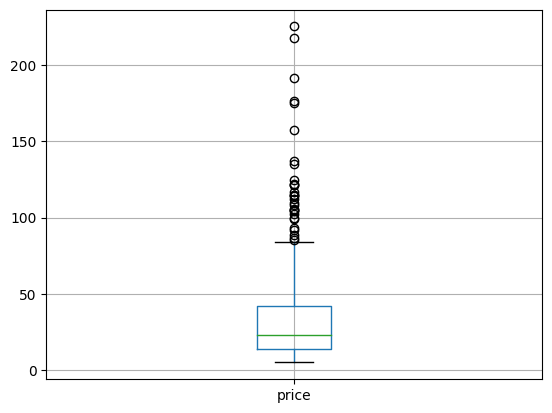

In [69]:
#Création d'une Boite à moustache de la répartition des prix grâce à Pandas
df_merge_web.boxplot(column=['price']) # Pass 'price' as a list to the column argument

In [70]:
#Autre méthode avec plotly express
import plotly.express as px
fig = px.box(df_merge_web, y="price")
fig.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2 - Exploration par l'utisation de méthodes statistique</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.1 - Identification par le Z-index</h3>
</div>

In [71]:
#Calculer la moyenne du prix
display(df_merge_web['price'].mean())
#Calculer l'écart-type du prix
display(px.box(df_merge_web, y="price"))
#Calculer le Z-score
#le Z-score permet de mesurer l'écart entre chaque valeur d'un df de la moyenne de ce df. Il faut d'abord calculer l'écart type


32.33368347338936

In [72]:
ecart_type =df_merge_web['price'].std()
df_merge_web['zscore'] = (df_merge_web['price'] - df_merge_web['price'].mean()) / ecart_type
print(df_merge_web['zscore'])

0     -0.860030
1      0.314039
2      0.241565
3      0.998912
4     -0.356340
         ...   
728    0.930063
729    0.930063
730    2.162110
731    0.814105
733   -0.265748
Name: zscore, Length: 714, dtype: float64


In [73]:
#Quel est le seuil prix dont z-score est supérieur à 3?
condition = df_merge_web['zscore'] > 3


In [74]:
df_outliers = df_merge_web[condition]
print(df_outliers)

     product_id  onsale_web  price  stock_quantity stock_status  \
24         4402           1  176.0              11      instock   
33         4406           1  157.0              12      instock   
171        4904           1  137.0               9      instock   
204        5001           1  217.5              18      instock   
235        5917           1  122.0              12      instock   
256        5612           1  124.8              19      instock   
257        6126           1  135.0             138      instock   
269        5892           1  191.3              98      instock   
281        6216           1  121.0              14      instock   
282        6213           1  121.0               9      instock   
291        6202           1  116.4              12      instock   
313        5767           1  175.0              12      instock   
567        4352           1  225.0               0   outofstock   

     purchase_price id_web  total_sales product_type  \
24   

In [75]:
df_outliers = df_outliers[['post_title', 'price', 'zscore']]

In [76]:
df_outliers #verifier le prix sur google pour etre sur que ce sont des valeurs aberrantes et pas erronée. Ici alcool de luxe

,post_title,price,zscore
24,Cognac Frapin VIP XO,176.0,5.205993
33,Cognac Frapin Château de Fontpinot 1989 20 Ans...,157.0,4.517496
171,Domaine Des Croix Corton Charlemagne Grand Cru...,137.0,3.792762
204,David Duband Charmes-Chambertin Grand Cru 2014,217.5,6.709816
235,Wemyss Malts Single Cask Scotch Whisky Choc 'n...,122.0,3.249211
256,Domaine Weinbach Gewurztraminer Grand Cru Furs...,124.8,3.350674
257,Champagne Gosset Célébris Vintage 2007,135.0,3.720288
269,Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...,191.3,5.760415
281,Domaine des Comtes Lafon Volnay 1er Cru Champa...,121.0,3.212975
282,Domaine des Comtes Lafon Volnay 1er Cru Santen...,121.0,3.212975


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.2 - Identification par l'interval interquartile</h3>
</div>

In [77]:
#Utilisation de la fonction describe de Pandas pour l'etude des mesures de dispersions
df_merge_web['price'].describe()

,price
count,714.000000
mean,32.333683
std,27.596332
min,5.200000
25%,14.062500
50%,23.450000
75%,42.075000
max,225.000000


In [78]:
#Définissez un seuil pour les articles "outliers" en prix
Q1 = df_merge_web['price'].quantile(0.25)
Q3 = df_merge_web['price'].quantile(0.75)
IQR = Q3 - Q1
coef = IQR * 1.5
borne_inf = Q3 - coef
borne_sup = Q3 + coef
#comme la borne inferieur est négative je prend la valeur minimum
borne_inf = df_merge_web['price'].min()
print(borne_inf)
print(borne_sup)

5.2
84.09375


In [79]:
#Définissez le nombre d'articles et la proportion de l'ensemble du catalogue "outliers"
outlier = df_merge_web[(df_merge_web['price'] < borne_inf) | (df_merge_web['price'] > borne_sup)]
print(outlier)

     product_id  onsale_web  price  stock_quantity stock_status  \
22         4404           1  108.5              17      instock   
23         4407           1  104.0              14      instock   
24         4402           1  176.0              11      instock   
33         4406           1  157.0              12      instock   
53         6214           1   99.0               9      instock   
54         5008           1  105.0              12      instock   
56         4132           1   88.4               7      instock   
87         6215           1  115.0              14      instock   
88         5007           1  105.0              15      instock   
89         4582           1  109.6              18      instock   
143        4359           1   85.6             112      instock   
149        5026           1   86.8             101      instock   
150        5025           1  112.0             136      instock   
157        6212           1  115.0              16      instoc

In [80]:
#Selon vous, ces outliers sont-ils justifiés ? Comment le démontrer si cela est possible ?
# Oui pour moi ces outliers sont justifiés car le vin / alcool / spiritueux est un produit de luxe qui selon la qualité peut atteindre des prix très élevées. On peut le démontrer en vérifiant les prix de ces références sur le net

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 5 - Analyse univarié du CA, des quantités vendues, des stocks et de la marge ainsi qu'une analyse multivarié  </h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.1 - Analyse des ventes en CA</h3>
</div>

In [81]:
##############################
# Calculer le CA du site web #
##############################

#Créez une colonne calculant le CA par article
df_merge_web['ca_article']= df_merge_web['price'] * df_merge_web['total_sales']
ca_total = df_merge_web['ca_article'].sum()
print(ca_total)
print(sum(df_merge_web['total_sales']))
#Calculez la somme de la colonne "ca_par_article"
#Ce résultat correspond au chiffre d'affaire du site web


143680.1
5751.0


<Axes: title={'center': 'Les 20 premiers articles en CA'}, ylabel='post_title'>

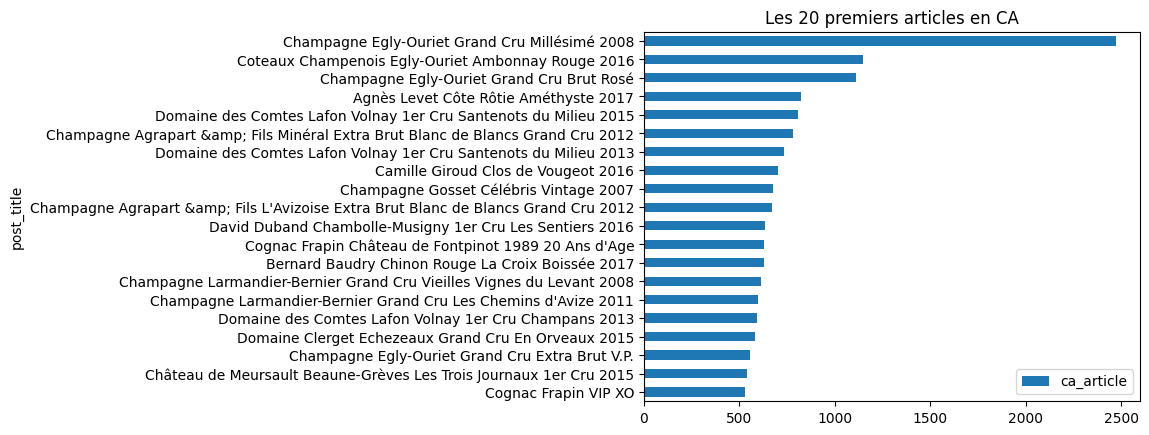

In [82]:
###############################
# Palmares des articles en CA #
###############################

#Effectuer le tri dans l'ordre décroissant du CA du dataset df_merge
df_merge_web.sort_values(by='ca_article', ascending=True, inplace=True)
df_merge_web.head()
#Réinitialiser l'index du dataset par un reset_index
reset_index = df_merge_web.reset_index(drop=True)
#Afficher les 20 premier articles en CA
reset_index.tail(20)
#Graphique en barre des 20 premiers articles avec plotly express
reset_index.tail(20).plot(kind='barh', x='post_title', y='ca_article', title='Les 20 premiers articles en CA')

In [83]:
#############################
# Calculer le 20 / 80 en CA #
#############################

#Créer une colonne calculant la part du CA de la ligne dans le dataset
df_merge_web['part_ca'] = df_merge_web['ca_article']/ ca_total

df_merge_web.sort_values(by='part_ca', ascending=False, inplace=True)
#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée
df_merge_web['part_ca_cumul'] = df_merge_web['part_ca'].cumsum()
#Grâce au deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% du CA
df_merge_web_80_ca = df_merge_web[df_merge_web['part_ca_cumul'] <= 0.8]
#Afficher la proportion que représentent ce groupe d'articles dans le catalogue entier du site web
print((df_merge_web_80_ca.shape[0]/df_merge_web.shape[0])*100)
print(df_merge_web.shape[0])
#la regle des 20/80 n'est pas respecté
nb_web_80_ca = df_merge_web_80_ca.shape[0]
nb_web = df_merge_web.shape[0]

df_proportion = pd.DataFrame({'categories': ['Articles 80% CA', 'Autres articles'],'nombre': [nb_web_80_ca / nb_web, 1-(nb_web_80_ca / nb_web)]})

px.pie(df_proportion, values='nombre', names='categories', title="Proportion des articles représentant 80% du CA")


60.78431372549019
714


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.2 - Analyse des ventes en Quantités</h3>
</div>

<Axes: title={'center': 'les 20 premiers articles en quantités vendus'}, ylabel='post_title'>

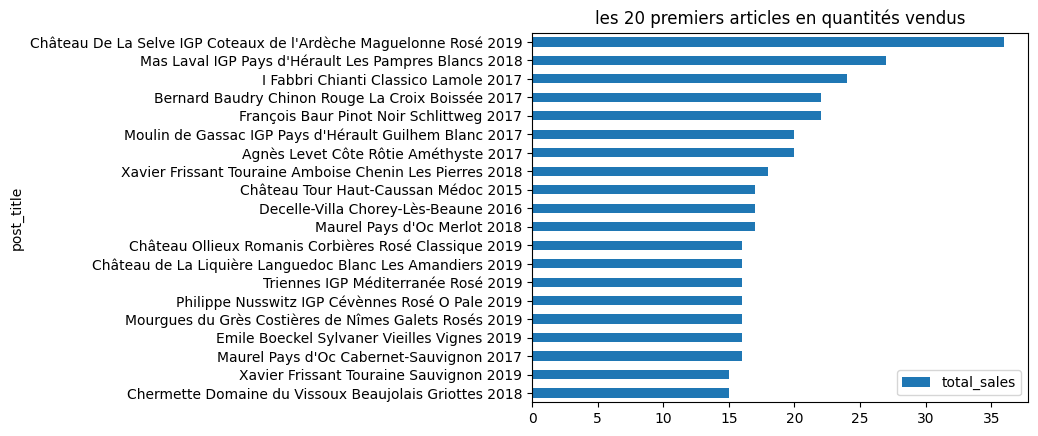

In [84]:
#####################################
# Palmares des articles en quantité #
#####################################

#Effectuer le tri dans l'ordre décroissant de quantités vendues du dataset df_merge
df_merge_web.sort_values(by='total_sales', ascending=True, inplace=True)
#Réinitialiser l'index du dataset par un reset_index
reset_index_q = df_merge_web.reset_index(drop=True)
#Afficher les 20 premier articles en quantité
reset_index_q.tail(20)
#Graphique en barre des 20 premiers articles avec plotly express
df_merge_web.tail(20).plot(kind ='barh', x='post_title', y='total_sales', title='les 20 premiers articles en quantités vendus' )

In [85]:
#############################
# Calculer le 20 / 80 en CA #
#############################

#Créer une colonne calculant la part en quantité de la ligne dans le dataset
df_merge_web['part_quantite'] = df_merge_web['total_sales']/ df_merge_web['total_sales'].sum()
#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée
df_merge_web['part_quantite_cumul'] = df_merge_web['part_quantite'].cumsum()

#Grâce au deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% des ventes en quantité
df_merge_web_80_quantite = df_merge_web[df_merge_web['part_quantite_cumul'] <= 0.8]
#Afficher la proportion que représentent ce groupe d'articles dans le catalogue entier du site web
nb_web_80_quantite = df_merge_web_80_quantite.shape[0]
nb_web = df_merge_web.shape[0]

df_proportion_quantite = pd.DataFrame({'categories': ['Articles 80% quantité', 'Autres articles'],'nombre': [nb_web_80_quantite / nb_web, 1-(nb_web_80_quantite / nb_web)]})
#ici non plus cela ne respecte pas la regle des 20/80
px.pie(df_proportion_quantite, values='nombre', names='categories', title="Proportion des articles représentant 80% des quantites")

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.3 - Analyse des stocks</h3>
</div>

<ipython-input-86-f0a3d7e8d248>:13: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





<Axes: title={'center': 'Flop 20 des produits qui ont le plus de mois de stock'}, ylabel='post_title'>

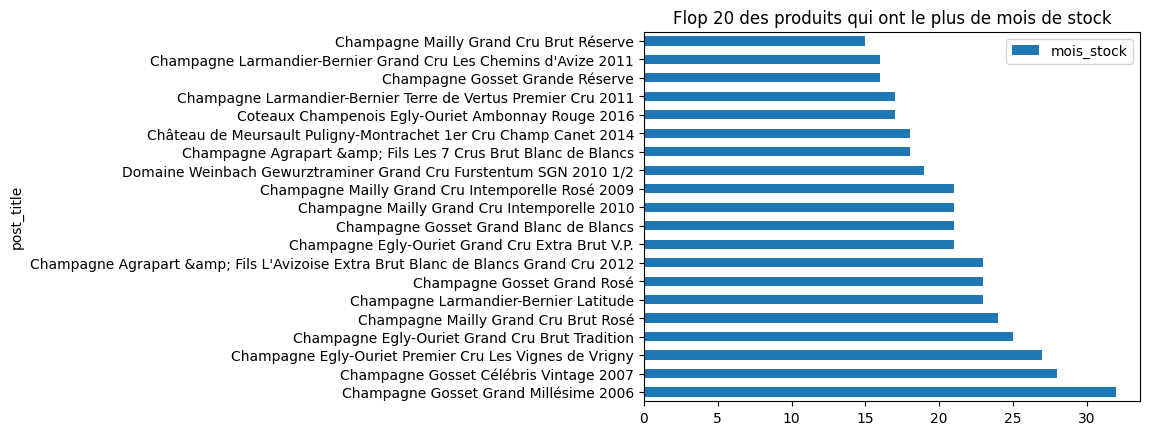

In [86]:
######################################
# Calcule le nombre de mois de stock #
######################################

#Import de numpy
import numpy as np

#Création de la colonne Rotation de stock
#1 vente moyenne mensuel : les ventes sont sur 1 mois (1er octobre au 31)
#2 mois de stock
df_merge_web['mois_stock'] = np.ceil(df_merge_web['stock_quantity']/df_merge_web['total_sales']) #np.ceil arrondit à la valeur superieur --> pertinent pour le nombre de mois
#Remplacement des "inf" par 0
df_merge_web['mois_stock'].replace(np.inf, 0, inplace=True)
#Effectuer le tri dans l'ordre décroissant du nombre de mois de stock dans le dataset df_merge
df_merge_web.sort_values(by='mois_stock', ascending=False, inplace=True)
#Graphique en barre du flop 20 des produits qui ont le plus de mois de stock
df_merge_web.head(20).plot(kind='barh', x='post_title', y='mois_stock', title='Flop 20 des produits qui ont le plus de mois de stock')

In [87]:
####################################
# Valorisation des stocks en euros #
####################################

#Création de la colonne Valorisation des stocks en euros
df_merge_web['stock_valeur'] = df_merge_web['stock_quantity']*df_merge_web['price']

#Calculer la somme de la colonne "Valorisation_stock_euros"
print(df_merge_web['stock_valeur'].sum())


494637.9


In [88]:
##############################################
# Valorisation du nombre de produit en stock #
##############################################

#Calculer la somme de la colonne stock quantity
print(df_merge_web['stock_quantity'].sum())

16740


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.4 - Analyse du taux de marge</h3>
</div>

In [89]:
############################
# Analyse du taux de marge #
############################

#Création de la colonne prix HT
df_merge_web['price_ht'] = df_merge_web['price']/1.2
#Création de la colonne Taux de marge
df_merge_web['taux_marge'] = ((df_merge_web['price_ht']-df_merge_web['purchase_price'])/df_merge_web['purchase_price'])
#Afficher le prix minimum de la colonne "taux_marge"
print(df_merge_web['taux_marge'].min())
#Afficher le prix maximum de la colonne "taux_marge"
print(df_merge_web['taux_marge'].max())

-0.8639433832386852
0.9141247090530442


In [90]:
#affichage de la ligne avec un taux de marge inférieur à 0
df_merge_web[df_merge_web['taux_marge']<=0]

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,total_sales,product_type,post_title,zscore,ca_article,part_ca,part_ca_cumul,part_quantite,part_quantite_cumul,mois_stock,stock_valeur,price_ht,taux_marge
79,4355,1,12.65,97,instock,77.48,12589,0.0,Champagne,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,-0.713272,0.0,0.0,1.0,0.0,0.0,0.0,1227.05,10.541667,-0.863943


In [91]:
#création d'un dataframe avec les taux positifs
df_merge_web_positif = df_merge_web[df_merge_web['taux_marge']>0]
#Afficher le prix minimum de la colonne "taux_marge"
print(df_merge_web_positif['taux_marge'].min())
#Afficher le prix maximum de la colonne "taux_marge"
print(df_merge_web_positif['taux_marge'].max())


0.2949782522736259
0.9141247090530442


Index(['product_type', 'taux_marge'], dtype='object')


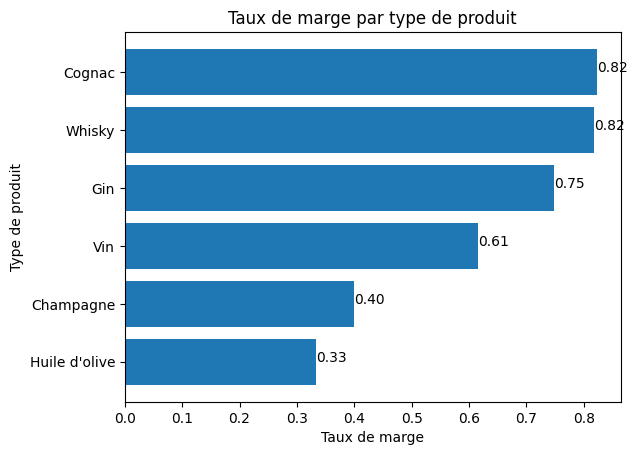

In [92]:
#création d'un dataframe avec le taux de marge moyen par type de produit
import matplotlib.pyplot as plt
df_merge_web_marge_moyen_produit = df_merge_web_positif.groupby('product_type')['taux_marge'].mean().reset_index() #aggregation des données avant viz. On groupe by product type
df_merge_web_marge_moyen_produit.sort_values(by='taux_marge', ascending=True, inplace=True)
print(df_merge_web_marge_moyen_produit.columns)
#Affichage dans un graphique du taux de marge par type de produit
plt.barh(df_merge_web_marge_moyen_produit['product_type'], df_merge_web_marge_moyen_produit['taux_marge'])
for index, value in enumerate(df_merge_web_marge_moyen_produit['taux_marge']): #enumerate permet de parcourir les éléments d'une colonne (index et valeur) ici pour chaque barre du graphique on a l'index et la valeur du taux de marge pour cette barre
    plt.text(value, index, f'{value:.2f}')
plt.xlabel('Taux de marge')
plt.ylabel('Type de produit')
plt.title('Taux de marge par type de produit')
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.5 - Analyse des correlations entre les variables stock, sales et price</h3>
</div>

<Axes: >

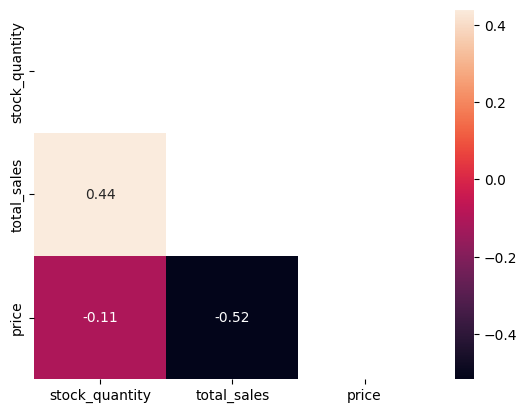

In [93]:
############################
# Analyse des correlations #
############################

#Importation de Seaborn
import seaborn as sns
#Création d'un heatmap de correlation avec les variables stock, sales et price
#sns.heatmap(df_merge_web[['stock_quantity', 'total_sales', 'price']].corr(), annot=True)
#on peut également créer un mask pour n'afficher qu'une demi heatmap (voir coefficient de spearman)
sns.heatmap(df_merge_web[['stock_quantity', 'total_sales', 'price']].corr(), annot=True, mask=np.triu(df_merge_web[['stock_quantity', 'total_sales', 'price']].corr()))

In [94]:
#Que peut-on conclure des correlations ?
#Il y a une correlation négative modérée entre le total des ventes et le prix. Cela signifie que si une valeur augmente l'autre diminue. Cela semble logique que lorsqu'on augmente le prix, le total des ventes diminue.
#il y a une correlation positive modérée  également entre le total des ventes et le stock.  On peut considérer que lorsque les ventes augmentent on a besoin d'augmenter la quantité de stock pour se prémunir d'un stock 0.
#Enfin il y a une correlation négative très faible entre le prix et les quantité de stocks.

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.6 - Mettre à disposition la nouvelle table sur un fichier Excel</h3>
</div>

In [95]:
#Mettre le dataset df_merge sur un fichier Excel
#Cette étape peut-être utile pour partager le résultat du dataset obtenu pour le partager avec les équipes.
df_merge_web.to_excel("\df_merge.xlsx", index=False)